In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# > ****EDA ON STUDENTS-PERFORMANCE DATASET:
Introduction:
In this notebook, I have done the Exploratory Data Analysis of the STUDENTS-PERFORMANCE dataset. ********

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Preliminary Data Processing:
To start off, we read in our dataset and generate a simple preview and statistics of our data.

Loading Data:

In [3]:
df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


The output shows that we have around 1000 entries with 7 columns in our dataset.

# **Understanding the Data:

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The output shows the first 4 rows of our dataset.

In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


The output shows the first 5 rows of our dataset.

In [6]:
df.shape

(1000, 8)

we have 1000 records with 8 columns

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

The output shows the names of the columns in our dataset

In [8]:
df.dtypes.value_counts()

object    5
int64     3
dtype: int64

5 of the columns are objects while the other 3 are categorical which is seen by dtpes function.

In [9]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


This method generates a high-level summary of the attributes over each column of the dataset. More probably, it provides the statistical insights of the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Here is the more information of our dataset chosen. We can see that all the columns of our dataset are free from null values.

In [11]:
df.duplicated().sum()

0

From this output, it is clear that we don't have any duplicates in our dataset.

In [ ]:
df["gender"].value_counts()

Here, we observed that our dataset is not balanced to the mark as there are two different gender of which female is the most occurring gender.

In [12]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

So, we are having two different lunch in our dataset.

In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Here,we get the missing values in each column present in our dataset.



In [14]:
df.dropna(inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


From this,we are getting the dataset by removing all the inconsistency present in it.

In [15]:
df.iloc[:10,:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college
5,female,group B,associate's degree
6,female,group B,some college
7,male,group B,some college
8,male,group D,high school
9,female,group B,high school


In [16]:
df.loc[:,["race/ethnicity","parental level of education"]]

,race/ethnicity,parental level of education
0,group B,bachelor's degree
1,group C,some college
2,group B,master's degree
3,group A,associate's degree
4,group C,some college
...,...,...
995,group E,master's degree
996,group C,high school
997,group C,high school
998,group D,some college


# Visualization:


> COUNT PLOT

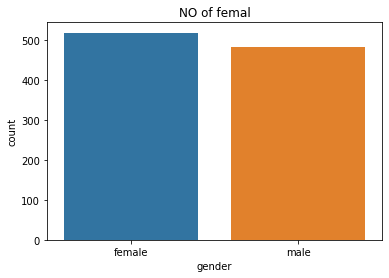

In [17]:
plt.title('NO of femal')
plot=sns.countplot(x="gender",data=df)

From this visualization,we can observe that our dataset is not balanced as we don't have equal number of count of the femal. We can also observe that we have more number of female in the data.

> # SCATTER PLOT

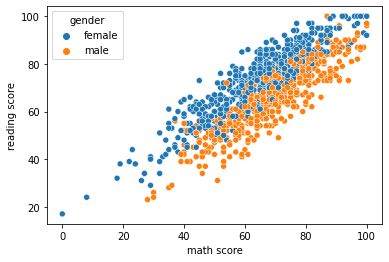

In [18]:
plot=sns.scatterplot(x='math score',y='reading score',hue="gender",data=df)

From the above visualization, we can tell that the female has smaller reading score but higher math score.

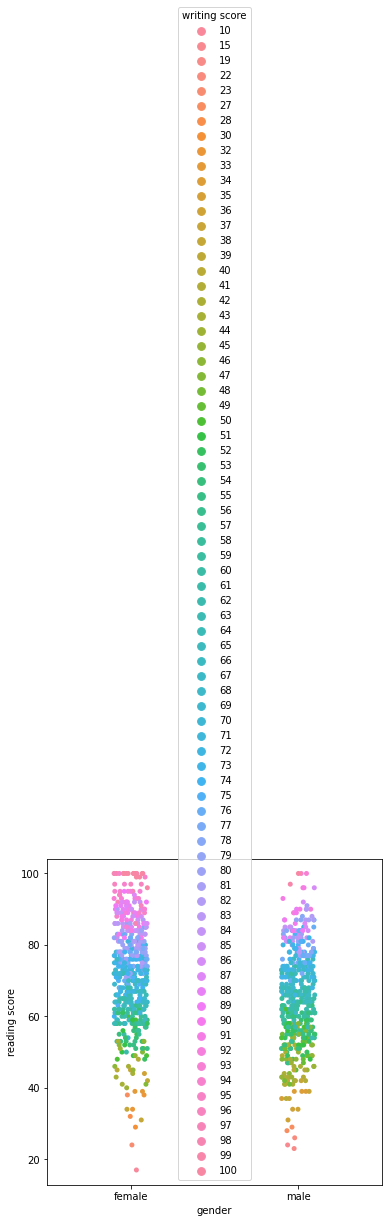

In [19]:
fig, axs = plt.subplots(figsize = (6,6))
plot=sns.stripplot(x="gender",y="reading score",hue="writing score",data=df);

From the above visualization,we observed that the male  has higher readingscore when compared to female  of our dataset.

# BOX PLOT

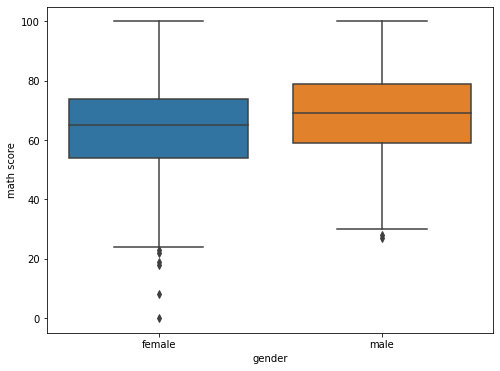

In [20]:
fig, axs = plt.subplots(figsize = (8,6))
plot=sns.boxplot(x="gender",y="math score",data=df)

here we can obger the male and female mathe score almost equal.

# Correlation Between Variables

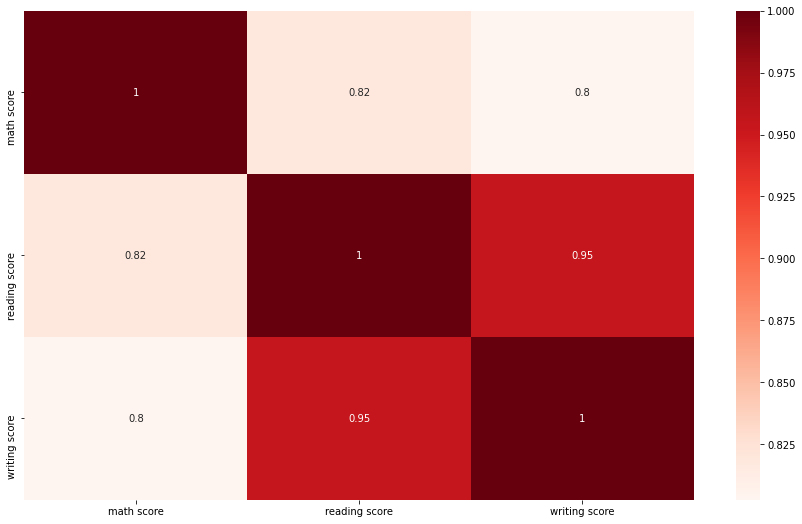

In [21]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Reds', annot = True);

# HIST PLOT

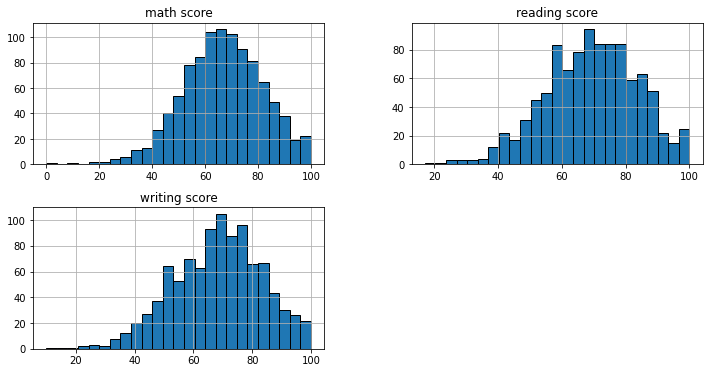

In [22]:
df.hist(edgecolor='black',bins = 25, figsize= (12,6))
plt.show()

Here,we can visualize the distribution of mathe score, and reading score of our dataset.

# PAIR PLOT

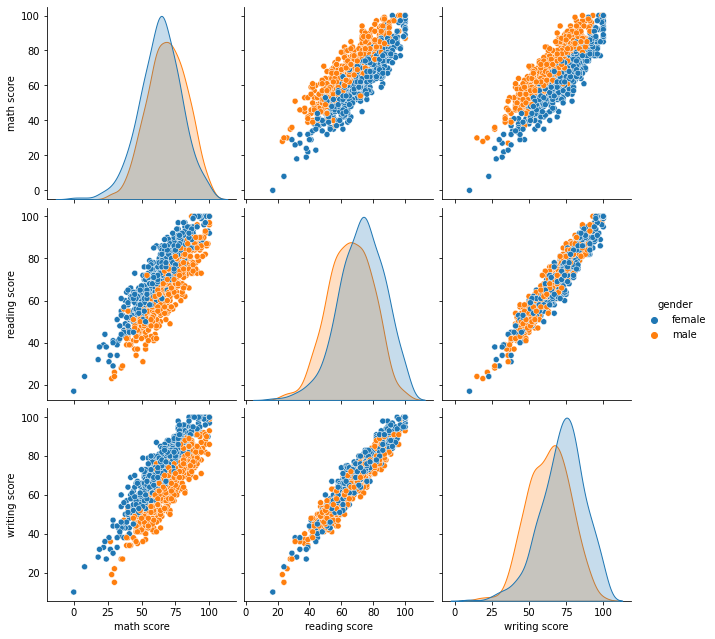

In [23]:
sns.pairplot(data = df,hue="gender", height=3)

pairplot is showing the bivariate relation between each pair of features. From the pairplot, we'll see that the Gento reading score is separataed from the other one across all  combinations


# JOINT PLOT

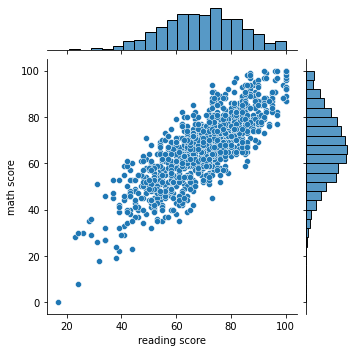

In [24]:
sns.jointplot(x="reading score", y="math score", data=df,height=5)
plt.show()

We can also use the seaborn library to make a similar plot. A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure.

# VIOLIN PLOT

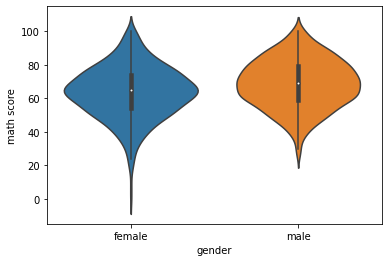

In [25]:
sns.violinplot(x="gender", y="math score", data=df, size=6)
plt.show()

Here,we can observe that bothfemale and male have almost equal range of math scores. 

CONCLUSION:
*The dataset is not balanced i.e. equal records are not present for all three species.
*We have two numerical columns while two categorical columns.
*I think that bothe male and female genders have equal no of scores in mathes
*